In [1]:
import matplotlib.pyplot as plt  # For plotting graphs
from keras.layers import Dense, Flatten  # For creating neural network layers
from keras.models import Sequential  # For creating a sequential model
from keras.utils import to_categorical  # For converting labels to one-hot encoding
from keras.datasets import mnist  # For importing the MNIST dataset
from keras import utils  # For various utility functions


import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
print(y_test.shape)

(10000,)


In [5]:
print(x_train.shape)

(60000, 28, 28)


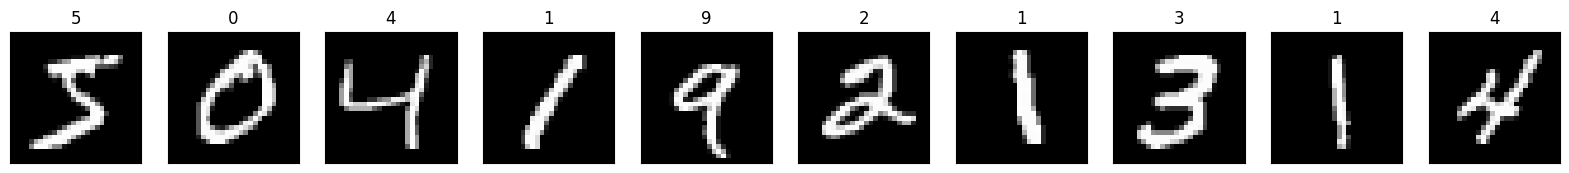

In [6]:
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
# Loop through the first 10 images
for i in range(10):
    # Set the title of each subplot to the corresponding label in y_train
    axes[i].set_title(y_train[i])
    # Display each image in grayscale
    axes[i].imshow(x_train[i], cmap='gray')
    # Hide the x-axis
    axes[i].get_xaxis().set_visible(False)
    # Hide the y-axis
    axes[i].get_yaxis().set_visible(False)

# Show the plot
plt.show()


In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [8]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [9]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
print(y_test.shape)

(10000, 10)


In [11]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7965 (31.11 KB)
Trainable params: 7965 (31.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


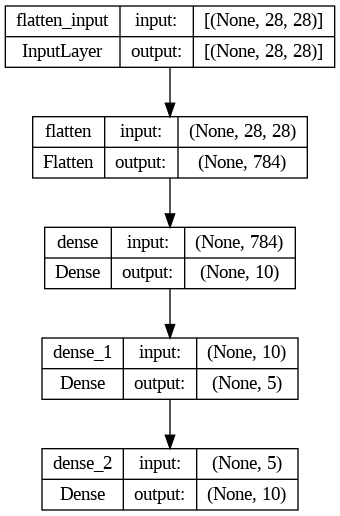

In [13]:
utils.plot_model(model, show_shapes=True)

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [15]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.7457 - acc: 0.4892 - val_loss: 1.3433 - val_acc: 0.5932
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1901 - acc: 0.6404 - val_loss: 1.0233 - val_acc: 0.7008
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9436 - acc: 0.7224 - val_loss: 0.8699 - val_acc: 0.7502
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8256 - acc: 0.7562 - val_loss: 0.7533 - val_acc: 0.7820
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7573 - acc: 0.7791 - val_loss: 0.7428 - val_acc: 0.7795
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7190 - acc: 0.7884 - val_loss: 0.7437 - val_acc: 0.7656
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6920 - acc: 0.7957 - val_loss: 0.6221 - val_acc: 0.8127
Epoch 8/10
1875/1875 [==============================] - 7s 4m

In [16]:
# Saving the trained model to a file named 'mnist_models_scifer.h5'
model.save('mnist_models_scifers.h5')

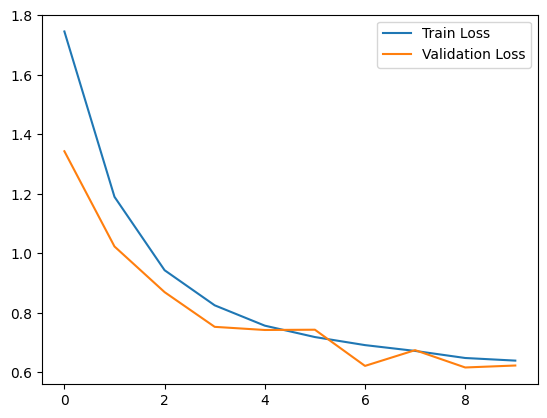

In [17]:
plt.plot(history.history['loss'], label='Train Loss')

# Plotting the validation loss curve
plt.plot(history.history['val_loss'], label='Validation Loss')

# Adding legend to the plot
plt.legend()

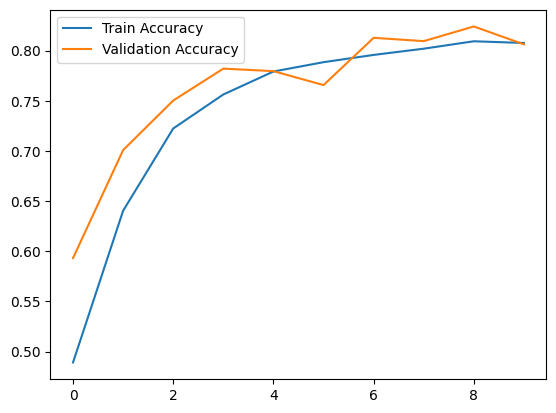

In [18]:
plt.plot(history.history['acc'], label='Train Accuracy')

# Plotting the validation accuracy curve
plt.plot(history.history['val_acc'], label='Validation Accuracy')

# Adding legend to the plot
plt.legend()


In [20]:
import tensorflow as tf

In [21]:
model = tf.keras.models.load_model('mnist_models_scifers.h5')

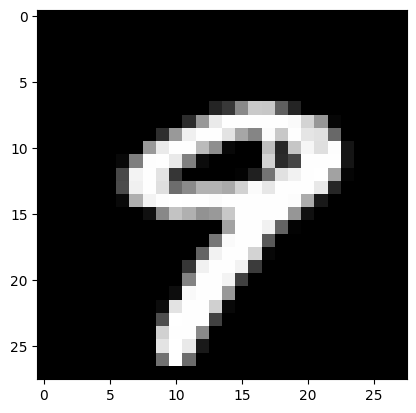

In [22]:
plt.imshow(x_test[9], cmap='gray')

In [23]:
import numpy as np

# Reshaping the first test image to match the model's input shape
x = np.reshape(x_test[9], (1, 28, 28))

# Using the trained model to predict the class label for the input image
predicted_label = np.argmax(model.predict(x))

# Printing the predicted class label
print(predicted_label)


1/1 [==============================] - 1s 561ms/step
9
